## Spatial Transformations: Convolution & Correlation


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d, correlate2d

 -----------------------------
### 1. Image Pre-processing
-----------------------------

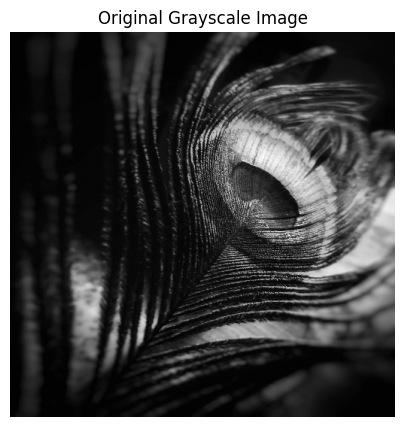

In [ ]:

# Load grayscale image 
img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)  
img = cv2.resize(img, (512, 512))   
img = img / 255.0  

plt.figure(figsize=(5,5))
plt.title("Original Grayscale Image")
plt.imshow(img, cmap='gray')
plt.axis("off")
plt.show()


 -----------------------------
### 2. Apply Convolution
 -----------------------------

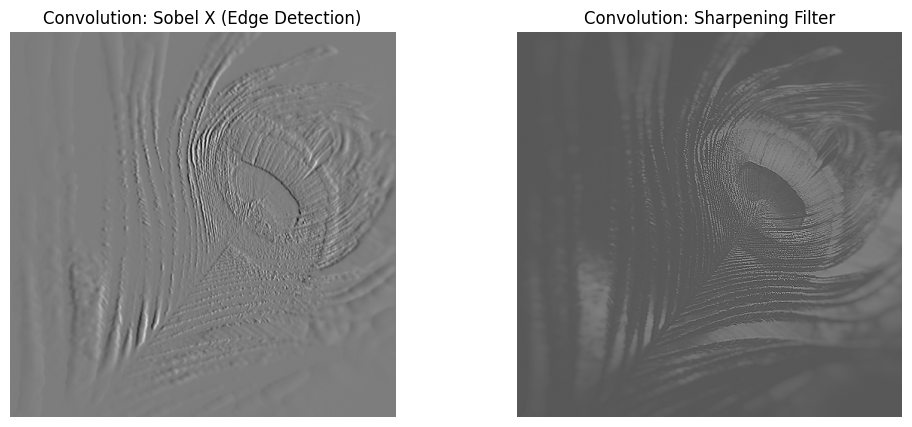

In [15]:
# Define kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])  # Edge Detection in X

sharpen = np.array([[0, -1, 0],
                    [-1, 5,-1],
                    [0, -1, 0]])  # Sharpening

# Convolution using scipy
conv_sobel = convolve2d(img, sobel_x, mode='same', boundary='symm')
conv_sharpen = convolve2d(img, sharpen, mode='same', boundary='symm')

# Show results
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Convolution: Sobel X (Edge Detection)")
plt.imshow(conv_sobel, cmap='gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Convolution: Sharpening Filter")
plt.imshow(conv_sharpen, cmap='gray')
plt.axis("off")
plt.show()


 -----------------------------
### 3. Apply Correlation
 -----------------------------

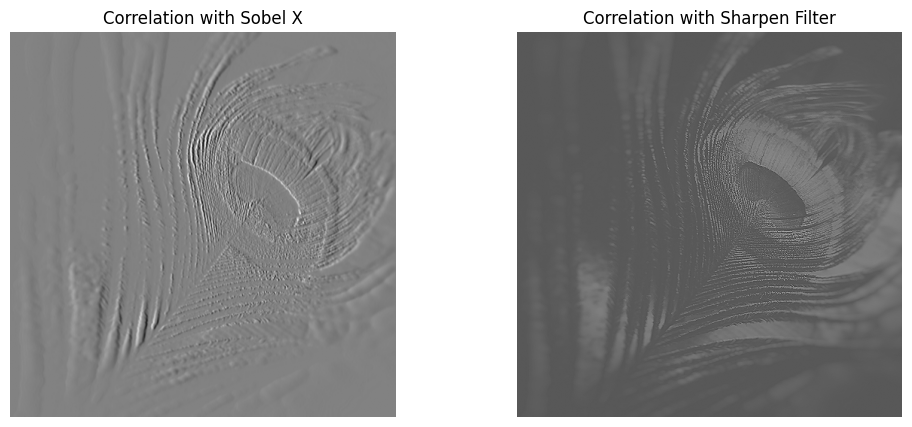

In [16]:

corr_sobel = correlate2d(img, sobel_x, mode='same', boundary='symm')
corr_sharpen = correlate2d(img, sharpen, mode='same', boundary='symm')

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Correlation with Sobel X")
plt.imshow(corr_sobel, cmap='gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Correlation with Sharpen Filter")
plt.imshow(corr_sharpen, cmap='gray')
plt.axis("off")
plt.show()


-----------------------------
### 4. Edge Detection + Gaussian Blur
 -----------------------------

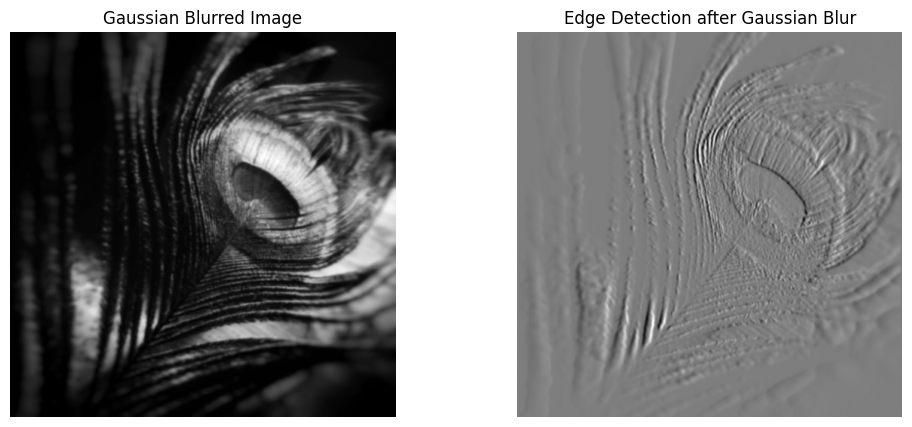

In [17]:
# Apply Gaussian Blur
gaussian_blur = cv2.GaussianBlur(img, (5,5), 1)

# Edge detection from convolution (sobel_x result)
edge_enhanced = convolve2d(gaussian_blur, sobel_x, mode='same', boundary='symm')

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Gaussian Blurred Image")
plt.imshow(gaussian_blur, cmap='gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Edge Detection after Gaussian Blur")
plt.imshow(edge_enhanced, cmap='gray')
plt.axis("off")
plt.show()



 -----------------------------
### 5. Comparison & Analysis
 -----------------------------

 Analysis & Observations:
1. Convolution with Sobel X highlights vertical edges clearly.
2. Convolution with Sharpen filter enhances edges and makes image crisper.
3. Correlation gives similar results to convolution but without kernel flipping, slight variations are observed.
4. Gaussian Blur removes noise; applying Sobel after blur gives cleaner edge maps.
5. Combining blur + edge detection helps in highlighting significant edges while reducing noise.